In [25]:
from transformers import pipeline
import nltk
from nltk import sent_tokenize
import torch
from glob import glob
import pandas as pd
import numpy as np

In [13]:
import transformers

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\riakh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

# Load Model 

In [21]:
model_name = "facebook/bart-large-mnli"
device = 0 if torch.cuda.is_available() else 'cpu'
device


'cpu'

In [16]:
def load_model(device):
    theme_classifier = pipeline(
        "zero-shot-classification",
        model = model_name,
        device = device
    )
    
    return theme_classifier

In [ ]:
def load_model(device, local_model_path):
    """
    Load the zero-shot classification model from a local folder.

    Args:
        device (int): Device ID (-1 for CPU, 0 for GPU, etc.).
        local_model_path (str): Path to the local folder containing the model files.

    Returns:
        theme_classifier: Zero-shot classification pipeline.
    """
    theme_classifier = pipeline(
        "zero-shot-classification",
        model=local_model_path,  # Use the local folder path here
        device=device
    )
    
    return theme_classifier

# Example Usage:
local_model_path = "C:\\Users\\riakh\\Downloads\\models\\facebook\\bart-large-mnli" 
theme_classifier = load_model(device, local_model_path)

# Test the model
result = theme_classifier("This is a test sentence.", candidate_labels=["test", "example"])
print(result)


{'sequence': 'This is a test sentence.', 'labels': ['test', 'example'], 'scores': [0.8293237090110779, 0.1706763058900833]}


In [23]:
theme_list = ["friendship","hope","sacrifice","battle","self development","betrayal","love","dialogue"]

In [24]:
theme_classifier(
    "I gave him a right hook then a left jab",
    theme_list,
    multi_label=True
)

{'sequence': 'I gave him a right hook then a left jab',
 'labels': ['battle',
  'self development',
  'hope',
  'sacrifice',
  'dialogue',
  'betrayal',
  'love',
  'friendship'],
 'scores': [0.9121253490447998,
  0.47500231862068176,
  0.08781788498163223,
  0.04500054940581322,
  0.020133014768362045,
  0.012040460482239723,
  0.004292402882128954,
  0.002817219588905573]}

# Load Dataset

In [30]:
files = glob("C:\\Users\\riakh\\Downloads\\NLP_TV_Series_Analysis\\data\\Subtitles\\*.ass")
files[:5]

['C:\\Users\\riakh\\Downloads\\NLP_TV_Series_Analysis\\data\\Subtitles\\Naruto Season 1 - 01.ass',
 'C:\\Users\\riakh\\Downloads\\NLP_TV_Series_Analysis\\data\\Subtitles\\Naruto Season 1 - 02.ass',
 'C:\\Users\\riakh\\Downloads\\NLP_TV_Series_Analysis\\data\\Subtitles\\Naruto Season 1 - 03.ass',
 'C:\\Users\\riakh\\Downloads\\NLP_TV_Series_Analysis\\data\\Subtitles\\Naruto Season 1 - 04.ass',
 'C:\\Users\\riakh\\Downloads\\NLP_TV_Series_Analysis\\data\\Subtitles\\Naruto Season 1 - 05.ass']

In [31]:
with open(files[0],'r') as file:
    lines = file.readlines()
    lines = lines[27:]
    lines =  [ ",".join(line.split(',')[9:])  for line in lines ]

In [32]:
lines[:2]

['A long time ago, a powerful demon fox\\Nappeared with nine tails.\n',
 'With its powerful tails,\n']

In [33]:
lines = [ line.replace('\\N',' ') for line in lines]

In [34]:
lines[:2]

['A long time ago, a powerful demon fox appeared with nine tails.\n',
 'With its powerful tails,\n']

In [35]:
" ".join(lines[:10])

"A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can't let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n"

In [36]:
int(files[0].split('-')[-1].split('.')[0].strip())

1

In [37]:
def load_subtitles_dataset(dataset_path):
    subtitles_paths = glob(dataset_path+"\\*.ass")

    scripts=[]
    episode_num=[]

    for path in subtitles_paths:

        #Read Lines
        with open(path,'r') as file:
            lines = file.readlines()
            lines = lines[27:]
            lines =  [ ",".join(line.split(',')[9:])  for line in lines ]
        
        lines = [ line.replace('\\N',' ') for line in lines]
        script = " ".join(lines)

        episode = int(path.split('-')[-1].split('.')[0].strip())

        scripts.append(script)
        episode_num.append(episode)

    df = pd.DataFrame.from_dict({"episode":episode_num, "script":scripts })
    return df

In [38]:
dataset_path = "C:\\Users\\riakh\\Downloads\\NLP_TV_Series_Analysis\\data\\Subtitles"
df = load_subtitles_dataset(dataset_path)

In [39]:
df.head()

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."
2,3,"C'mon!\n Running like a fugitive,\n Being chas..."
3,4,"C'mon!\n Running like a fugitive,\n Being chas..."
4,5,"C'mon!\n Running like a fugitive,\n Being chas..."


# Run Model

In [40]:
script = df.iloc[0]['script']

In [41]:
script

'A long time ago, a powerful demon fox appeared with nine tails.\n With its powerful tails,\n it could smash mountains and create tidal waves.\n A band of Ninjas rose to defend their village from attack.\n We have to wait until the Fourth Hokage gets here!\n We can\'t let it get any closer to our village!\n One great Ninja was able to imprison the monster,\n but died in the process.\n This Ninja was known as… the Fourth Hokage.\n Naruto!\n Why did you do such a thing?!\n You\'re really gonna get it this time!\n I don\'t care!\n You know your problem?\n You can\'t do the things I do!\n Only I can do this!\n I\'m better than all of you! Believe it!\n There\'s a problem, sir!\n Lord Hokage!\n What is it?\n Did that Naruto do something again?\n Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them!\n Wait!\n Ha ha…\n Why should I?\n Hey, Naruto!\n How did you suddenly get here, lruka Sensei?\n The question is what are you doing here when you should 

In [42]:
script_sentences = sent_tokenize(script)
script_sentences[:3]

['A long time ago, a powerful demon fox appeared with nine tails.',
 'With its powerful tails,\n it could smash mountains and create tidal waves.',
 'A band of Ninjas rose to defend their village from attack.']

In [43]:
# Batch Sentence
sentence_batch_size=20
script_batches = []
for index in range(0,len(script_sentences),sentence_batch_size):
    sent = " ".join(script_sentences[index:index+sentence_batch_size])
    script_batches.append(sent)

In [44]:
script_batches[:2]

["A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
 'Yes. He climbed onto the Mountainside Images…\n And he vandalized and graffitied all over them! Wait! Ha ha…\n Why should I? Hey, Naruto! How did you suddenly get here, lruka Sensei? The question is what are you doing here when you should be in class now? Now listen, Naruto. You failed t

In [45]:
theme_output = theme_classifier(
    script_batches[:2],
    theme_list,
    multi_label=True
)

In [46]:
theme_output

[{'sequence': "A long time ago, a powerful demon fox appeared with nine tails. With its powerful tails,\n it could smash mountains and create tidal waves. A band of Ninjas rose to defend their village from attack. We have to wait until the Fourth Hokage gets here! We can't let it get any closer to our village! One great Ninja was able to imprison the monster,\n but died in the process. This Ninja was known as… the Fourth Hokage. Naruto! Why did you do such a thing?! You're really gonna get it this time! I don't care! You know your problem? You can't do the things I do! Only I can do this! I'm better than all of you! Believe it! There's a problem, sir! Lord Hokage! What is it? Did that Naruto do something again?",
  'labels': ['dialogue',
   'betrayal',
   'battle',
   'sacrifice',
   'self development',
   'hope',
   'friendship',
   'love'],
  'scores': [0.9800740480422974,
   0.9396902322769165,
   0.854688286781311,
   0.7349812984466553,
   0.7284972071647644,
   0.1990976482629776

In [47]:
# Wrangle Ouput
# battle: [0.51489498, 0.2156498]
themes = {}
for output in theme_output:
    for label,score in zip(output['labels'],output['scores']): #looping over two lists at the same time
        if label not in themes:
            themes[label] = []
        themes[label].append(score)

In [48]:
themes

{'dialogue': [0.9800740480422974, 0.9370125532150269],
 'betrayal': [0.9396902322769165, 0.645725667476654],
 'battle': [0.854688286781311, 0.6581315398216248],
 'sacrifice': [0.7349812984466553, 0.6258841753005981],
 'self development': [0.7284972071647644, 0.8678207397460938],
 'hope': [0.1990976482629776, 0.2042401134967804],
 'friendship': [0.05922339856624603, 0.08603335916996002],
 'love': [0.040261972695589066, 0.028020549565553665]}

In [49]:
def get_themes_inference(script):
    script_sentences = sent_tokenize(script)

    # Batch Sentence
    sentence_batch_size=20
    script_batches = []
    for index in range(0,len(script_sentences),sentence_batch_size):
        sent = " ".join(script_sentences[index:index+sentence_batch_size])
        script_batches.append(sent)
    
    # Run Model
    theme_output = theme_classifier(
        script_batches[:2],
        theme_list,
        multi_label=True
    )

    # Wrangle Output 
    themes = {}
    for output in theme_output:
        for label,score in zip(output['labels'],output['scores']):
            if label not in themes:
                themes[label] = []
            themes[label].append(score)

    themes = {key: np.mean(np.array(value)) for key,value in themes.items()}

    return themes

In [50]:
df = df.head(2)
df

,episode,script
0,1,"A long time ago, a powerful demon fox appeared..."
1,2,"C'mon!\n Running like a fugitive,\n Being chas..."


In [51]:
output_themes = df['script'].apply(get_themes_inference)

In [52]:
output_themes

0    {'dialogue': 0.9585433006286621, 'betrayal': 0...
1    {'dialogue': 0.960606187582016, 'sacrifice': 0...
Name: script, dtype: object

In [58]:
theme_df = pd.DataFrame(output_themes.tolist())
theme_df

,dialogue,betrayal,battle,sacrifice,self development,hope,friendship,love
0,0.958543,0.792708,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141
1,0.960606,0.429944,0.684846,0.570703,0.482810,0.154534,0.046261,0.173261


In [59]:
df[theme_df.columns] = theme_df
df

,episode,script,betrayal,battle,sacrifice,self development,hope,friendship,love,dialogue
0,1,"A long time ago, a powerful demon fox appeared...",0.792708,0.756410,0.680433,0.798159,0.201669,0.072628,0.034141,0.958543
1,2,"C'mon!\n Running like a fugitive,\n Being chas...",0.429944,0.684846,0.570703,0.482810,0.154534,0.046261,0.173261,0.960606


# Visualize Output

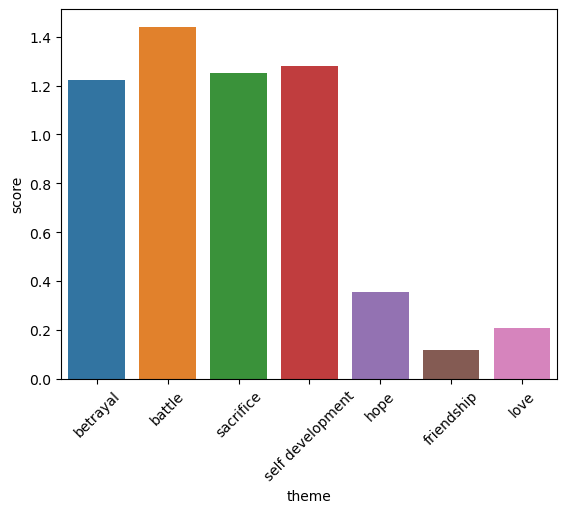

In [60]:
df = df.drop('dialogue',axis=1)
theme_output = df.drop(['episode','script'],axis=1).sum().reset_index()
theme_output.columns = ['theme','score']
theme_output

import matplotlib.pyplot as plt
import seaborn as sns
sns.barplot(data = theme_output ,x="theme",y="score" )
plt.xticks(rotation=45)
plt.show()